In [1]:
from pathlib import Path
import os
import sys

root_path = os.getcwd().split('application_source')[0] + 'application_source'
sys.path.append(root_path)

In [2]:
import pandas as pd
import os
from pathlib import Path

In [3]:
root_path = Path(os.getcwd().split('application_source')[0] + 'application_source')
print(root_path)

C:\work\Pycharm\sheduling_agent\Shceduling_AI\application_source


In [4]:
clients = pd.read_csv(Path(root_path) / 'data/raw_2/customer_data.csv')
customer_to_sales_rep = pd.read_csv(Path(root_path) /'data/raw_2/customer_to_sales_rep.csv')
meeting_notes = pd.read_csv(Path(root_path) /'data/raw_2/enhanced_sales_meeting_history.csv')
inventory_mapping = pd.read_csv(Path(root_path) /'data/raw_2/inventory_mapping.csv')

In [5]:
customer_to_sales_rep

,Sales Rep ID,Sales Rep Name,Customer ID,Customer Name
0,SR001,Jim Halpert,C001,Harvey Specter
1,SR001,Jim Halpert,C002,Mike Ross
2,SR001,Jim Halpert,C003,Louis Litt
3,SR002,Dwight Schrute,C004,Rachel Zane
4,SR002,Dwight Schrute,C005,Donna Paulsen
5,SR002,Dwight Schrute,C006,Katrina Bennett
6,SR003,Andy Bernard,C007,Jessica Pearson
7,SR003,Andy Bernard,C008,Samantha Wheeler
8,SR003,Andy Bernard,C009,Robert Zane


In [6]:
meeting_notes = meeting_notes[['Sales Rep ID', 'Customer ID', 'Meeting Timestamp', 'Meeting Notes', 'Meeting Outcome', 'Meeting Mode']]
meeting_notes

,Sales Rep ID,Customer ID,Meeting Timestamp,Meeting Notes,Meeting Outcome,Meeting Mode
0,SR001,C001,2024-12-25 12:00 AM,**Meeting Start**: Jim Halpert greeted Harvey ...,Customer requested samples,In-person
1,SR001,C001,2024-10-13 12:00 AM,**Meeting Start**: Jim Halpert greeted Harvey ...,Customer confirmed purchase,Video Call
2,SR001,C001,2024-12-21 12:00 AM,**Meeting Start**: Jim Halpert greeted Harvey ...,Customer confirmed purchase,Phone Call
3,SR001,C002,2024-12-03 12:00 AM,**Meeting Start**: Jim Halpert greeted Mike Ro...,Customer confirmed purchase,In-person
4,SR001,C002,2025-01-29 12:00 AM,**Meeting Start**: Jim Halpert greeted Mike Ro...,Customer declined for now,In-person
5,SR001,C002,2024-12-17 12:00 AM,**Meeting Start**: Jim Halpert greeted Mike Ro...,Customer needs internal approval,Video Call
6,SR001,C003,2024-11-27 12:00 AM,**Meeting Start**: Jim Halpert greeted Louis L...,Customer evaluating options,Video Call
7,SR001,C003,2025-01-22 12:00 AM,**Meeting Start**: Jim Halpert greeted Louis L...,Customer needs internal approval,Video Call
8,SR001,C003,2025-03-22 12:00 AM,**Meeting Start**: Jim Halpert greeted Louis L...,Customer needs internal approval,Phone Call
9,SR002,C004,2025-03-10 12:00 AM,**Meeting Start**: Dwight Schrute greeted Rach...,Customer confirmed purchase,Email Follow-up


In [7]:
print(inventory_mapping[['Product Name', 'Product Type']].to_markdown())

|    | Product Name   | Product Type    |
|---:|:---------------|:----------------|
|  0 | ProductA       | Glossy Paper    |
|  1 | ProductB       | Matte Paper     |
|  2 | ProductC       | Recycled Paper  |
|  3 | ProductD       | Cardstock Paper |
|  4 | ProductE       | Bond Paper      |
|  5 | ProductF       | Newsprint Paper |


In [8]:
df = pd.merge(customer_to_sales_rep, meeting_notes, on=['Customer ID', 'Sales Rep ID'], how='outer')

In [9]:
df.head()

,Sales Rep ID,Sales Rep Name,Customer ID,Customer Name,Meeting Timestamp,Meeting Notes,Meeting Outcome,Meeting Mode
0,SR001,Jim Halpert,C001,Harvey Specter,2024-12-25 12:00 AM,**Meeting Start**: Jim Halpert greeted Harvey ...,Customer requested samples,In-person
1,SR001,Jim Halpert,C001,Harvey Specter,2024-10-13 12:00 AM,**Meeting Start**: Jim Halpert greeted Harvey ...,Customer confirmed purchase,Video Call
2,SR001,Jim Halpert,C001,Harvey Specter,2024-12-21 12:00 AM,**Meeting Start**: Jim Halpert greeted Harvey ...,Customer confirmed purchase,Phone Call
3,SR001,Jim Halpert,C002,Mike Ross,2024-12-03 12:00 AM,**Meeting Start**: Jim Halpert greeted Mike Ro...,Customer confirmed purchase,In-person
4,SR001,Jim Halpert,C002,Mike Ross,2025-01-29 12:00 AM,**Meeting Start**: Jim Halpert greeted Mike Ro...,Customer declined for now,In-person


In [10]:
for index, row in df.iterrows():
    print(row)
    query = ""
    client_name = row['Customer Name']
    advisor_name = row['Sales Rep Name']
    timestamp = row['Meeting Timestamp']
    meet_type = row['Meeting Mode']
    query += f"Following is products list:\n\n{inventory_mapping[['Product Name', 'Product Type']].to_markdown()}"
    query += f"""\n\nCustomer Name: {client_name}\nSales Representative Name: {advisor_name}\n\nMeeting Type: {meet_type}\n\nConversation Flow:\n"""
    meeting_text = row['Meeting Notes']
    conclusion = row['Meeting Outcome']

    query += f"""{meeting_text}\n\nColnclusion : {conclusion}\n"""
    break

Sales Rep ID                                                     SR001
Sales Rep Name                                             Jim Halpert
Customer ID                                                       C001
Customer Name                                           Harvey Specter
Meeting Timestamp                                  2024-12-25 12:00 AM
Meeting Notes        **Meeting Start**: Jim Halpert greeted Harvey ...
Meeting Outcome                             Customer requested samples
Meeting Mode                                                 In-person
Name: 0, dtype: object


In [11]:
print(query)

Following is products list:

|    | Product Name   | Product Type    |
|---:|:---------------|:----------------|
|  0 | ProductA       | Glossy Paper    |
|  1 | ProductB       | Matte Paper     |
|  2 | ProductC       | Recycled Paper  |
|  3 | ProductD       | Cardstock Paper |
|  4 | ProductE       | Bond Paper      |
|  5 | ProductF       | Newsprint Paper |

Customer Name: Harvey Specter
Sales Representative Name: Jim Halpert

Meeting Type: In-person

Conversation Flow:
**Meeting Start**: Jim Halpert greeted Harvey Specter and asked about their current paper supply situation. Harvey mentioned a need for more Cardstock Paper and wanted to hear about any ongoing offers. Jim explained that ProductD (Cardstock Paper) has been popular and is currently part of a limited-time 10% discount campaign.

Harvey brought up a past issue regarding delayed delivery last quarter. Jim acknowledged this and assured that new quality checks have been implemented. They then discussed compatibility with

In [12]:
from services.dialog_service import Agent_Orchestrator
from services.agentic import Agent_Generate_Interaction, Agent_Generate_Summary

hosted


C:\work\Pycharm\sheduling_agent\Shceduling_AI\env\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'a124-106-219-60-246.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Error: 403, <!--# tNvJ6WH7TRmnRJqTg6JrSnS2qfSZ5W6WgWrgZf5d-->
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3c.org/TR/1999/REC-html401-19991224/loose.dtd">
<html>
<head>
<meta name="description" content="Zscaler makes the internet safe for businesses by protecting their employees from malware, viruses, and other security threats.">
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
<title>Internet Security by Zscaler</title>
<script language="JavaScript">var defLang = 'en_US'</script>
<!--UST Global INC-->
<style type="text/css">
body {
background-color:#e3e3e3;
font-family:Arial, sans-serif;
font-size:12px;
color:#4B4F54;
}
a {
cursor:pointer;
text-decoration:none;
color:#009dd0;
}
table {
margin-top:10px;
}
td table {
margin-top:0;
text-align:center;
}
img {
max-height:75px;
max-width:430px;
}
.pg {
position:absolute;
top:0;
bottom:0;
left:0;
right:0;
overflow-x:hidden;
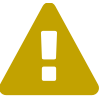

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [13]:
orchestrator = Agent_Orchestrator(prompt_func=Agent_Generate_Interaction().prompt_func)
generated_transcript = orchestrator.run(query)

In [ ]:
orchestrator = Agent_Orchestrator(prompt_func=Agent_Generate_Summary().prompt_func)
summary = orchestrator.run(query)

In [ ]:
print(generated_transcript)

In [ ]:
print(summary)